# Proyecto IDS
## Integrantes:
- Vicente Alarcón
- Matías Fontecilla

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [27]:
path_file = 'games.csv'
columns = ['AppID', 'Name', 'Release date', 'Estimated owners', 'Price', 'Metacritic score', 'Positive', 'Negative']
df = pd.read_csv(path_file, usecols=columns)
df = df[df['Metacritic score'] > 0]

df['Steam score'] = ((df['Positive'] / (df['Positive'] + df['Negative'])) * 100).round()
df['Steam score'] = df['Steam score'].replace([np.inf, -np.inf], np.nan).fillna(0).astype(int)

# Convertir la columna 'Estimated owners' a su promedio
df['Estimated owners'] = df['Estimated owners'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2)

# Crear la nueva columna 'Estimated earnings'
df['Estimated earnings'] = df['Estimated owners'] * df['Price']

df = df.loc[df['Positive'] + df['Negative'] > 500]

df = df.sort_values(by=['Steam score', 'Metacritic score'], ascending=False)
df.to_csv('filtered_games.csv', index=False)

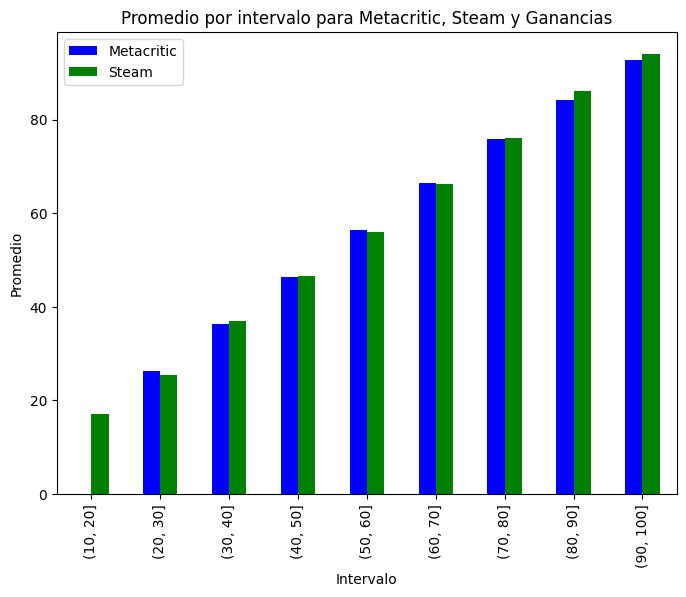

In [38]:
# Leer el archivo CSV
df = pd.read_csv('filtered_games.csv')

# Seleccionar las columnas relevantes
df = df[['AppID', 'Name', 'Metacritic score', 'Steam score', 'Estimated earnings']]

# Crear los intervalos
bins = range(0, 101, 10)

# Dividir los datos en intervalos
df['Intervalo Metacritic'] = pd.cut(df['Metacritic score'], bins)

# Dividir los datos en intervalos
df['Intervalo Steam'] = pd.cut(df['Steam score'], bins)

# Calcular el promedio para cada intervalo
promedio_por_intervalo_metacritic = df.groupby('Intervalo Metacritic', observed=True)['Metacritic score'].mean()

# Calcular el promedio para cada intervalo
promedio_por_intervalo_steam = df.groupby('Intervalo Steam', observed=True)['Steam score'].mean()

# Crear un DataFrame con los promedios por intervalo
df_promedios = pd.DataFrame({
    'Metacritic': promedio_por_intervalo_metacritic,
    'Steam': promedio_por_intervalo_steam,
})

# Graficar los promedios en un solo gráfico de barras
df_promedios.plot.bar(color=['blue', 'green'], figsize=(8, 6))
plt.title('Promedio por intervalo para Metacritic, Steam y Ganancias')
plt.xlabel('Intervalo')
plt.ylabel('Promedio')
plt.show()

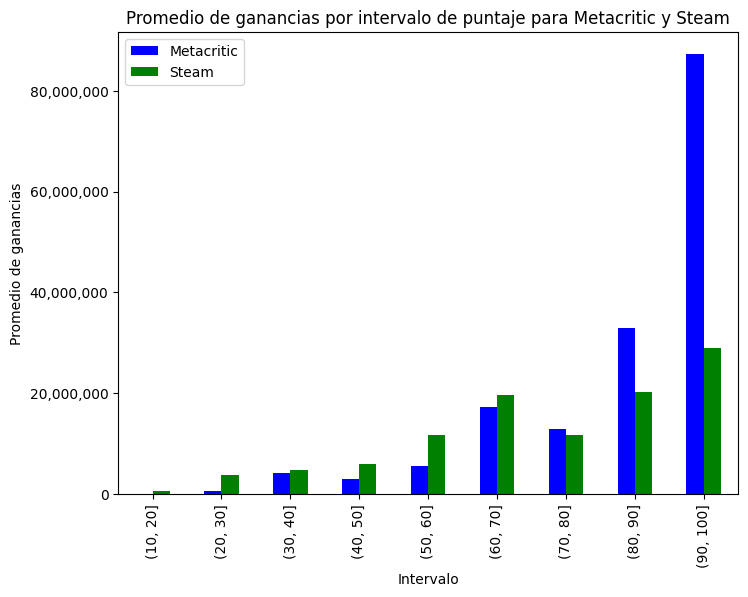

In [40]:
# Leer el archivo CSV
df = pd.read_csv('filtered_games.csv')

# Seleccionar las columnas relevantes
df = df[['AppID', 'Name', 'Metacritic score', 'Steam score', 'Estimated earnings']]

# Crear los intervalos
bins = range(0, 101, 10)

# Dividir los datos en intervalos
df['Intervalo Metacritic'] = pd.cut(df['Metacritic score'], bins)
df['Intervalo Steam'] = pd.cut(df['Steam score'], bins)

# Calcular el promedio de ganancias para cada intervalo de Metacritic
promedio_ganancias_por_intervalo_metacritic = df.groupby('Intervalo Metacritic', observed=True)['Estimated earnings'].mean()

# Calcular el promedio de ganancias para cada intervalo de Steam
promedio_ganancias_por_intervalo_steam = df.groupby('Intervalo Steam', observed=True)['Estimated earnings'].mean()

# Crear un DataFrame con los promedios de ganancias por intervalo
df_promedios = pd.DataFrame({
    'Metacritic': promedio_ganancias_por_intervalo_metacritic,
    'Steam': promedio_ganancias_por_intervalo_steam,
})

# Graficar los promedios de ganancias en un solo gráfico de barras
ax = df_promedios.plot.bar(color=['blue', 'green'], figsize=(8, 6))
plt.title('Promedio de ganancias por intervalo de puntaje para Metacritic y Steam')
plt.xlabel('Intervalo')
plt.ylabel('Promedio de ganancias')

# Formatear el eje Y para mostrar el número completo
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# print(promedio_ganancias_por_intervalo_metacritic)
# print(promedio_ganancias_por_intervalo_steam)

plt.show()

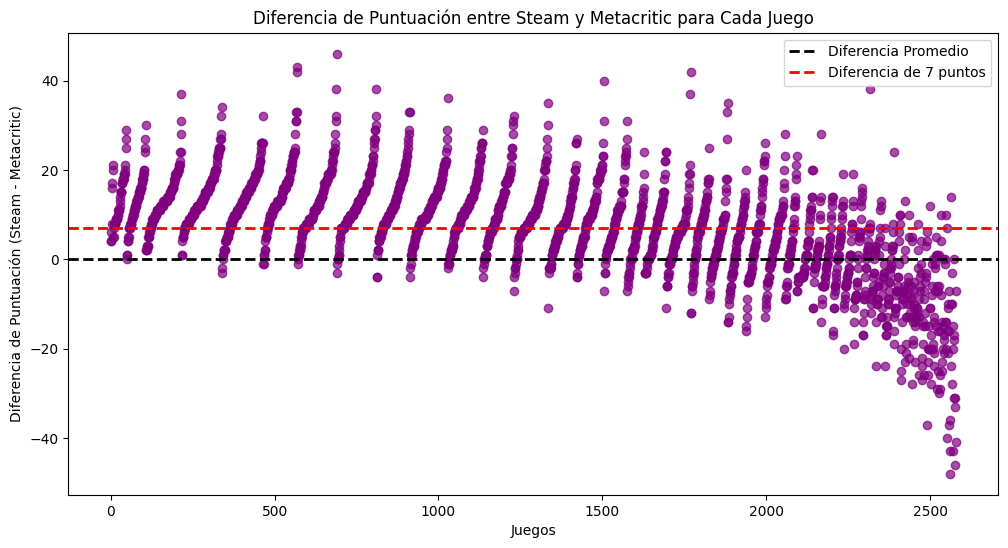

In [9]:
df = pd.read_csv('filtered_games.csv')
df = df[['AppID', 'Name', 'Metacritic score', 'Steam score']]
# Calcular la diferencia entre las puntuaciones
df['Diferencia'] = df['Steam score'] - df['Metacritic score']

# Calcular las medias
metacritic_mean = df['Metacritic score'].mean()
steam_mean = df['Steam score'].mean()

# Calcular la diferencia
diferencia = steam_mean - metacritic_mean

# Crear un gráfico de puntos
plt.figure(figsize=(12, 6))

# Dibujar los puntos
plt.scatter(df.index, df['Diferencia'], color='purple', alpha=0.7)

# Añadir líneas horizontales para resaltar la diferencia promedio
plt.axhline(y=0, color='black', linestyle='--', linewidth=2, label='Diferencia Promedio')
plt.axhline(y=7, color='red', linestyle='--', linewidth=2, label='Diferencia de 7 puntos')

# Añadir etiquetas y título
plt.xlabel('Juegos')
plt.ylabel('Diferencia de Puntuación (Steam - Metacritic)')
plt.title('Diferencia de Puntuación entre Steam y Metacritic para Cada Juego')
plt.legend()

# Mostrar el gráfico
plt.show()